In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
from app.drivers import CameraDriver as CD
from app.drivers import JenaDriver, KDC101

In [25]:
# exposure time is in microseconds
camera = CD({'exposure_time':500000})

In [10]:
# initialise and start camera
camera.initialise()
camera.start_acquisition()

In [ ]:
# shutter driver
idler_shut = KDC101('/dev/ttyUSB9', 'idler_shutter', tol=1e-4)

# initialise the shutter
idler_shut.initialise({})

In [28]:
# # define the piezo driver
z_fine = JenaDriver('/dev/ttyUSB5', 'z_fine')

# initialise the piezo
z_fine.initialise({})

# Data acquisition

## Dark Image

In [24]:
del idler_shut

In [16]:
idler_shut.get_position()

-2.0405783582089552e-07

In [12]:
# drive forward and acquire and image
idler_shut.set_parameters(15e-3)
dark_img = np.array(camera.get_image(), dtype=np.float32)
idler_shut.set_parameters(0e-3)

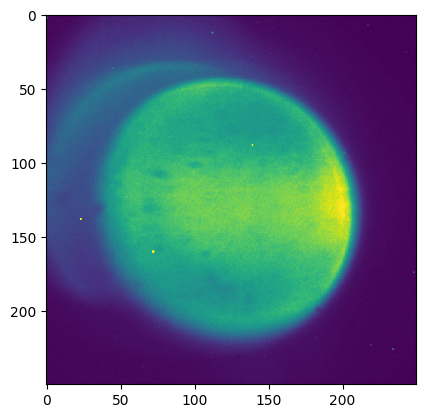

In [15]:
plt.imshow(dark_img, vmax=1200)
plt.show()

## Bright image 

In [29]:
img_list = []
piezo_posns = []
_step_size = 0.1
for step in np.arange(0, np.pi, _step_size):
    print(f'Jena stepping: {np.round(step, 3)}...', end='')
    z_fine.set_parameters(step)
    print('Done')
    new_img = np.array(camera.get_image(), dtype=np.float32)
    img_list.append(new_img)
    piezo_posns.append(step)

Jena stepping: 0.0...Done
Jena stepping: 0.1...Done
Jena stepping: 0.2...Done
Jena stepping: 0.3...Done
Jena stepping: 0.4...Done
Jena stepping: 0.5...Done
Jena stepping: 0.6...Done
Jena stepping: 0.7...Done
Jena stepping: 0.8...Done
Jena stepping: 0.9...Done
Jena stepping: 1.0...Done
Jena stepping: 1.1...Done
Jena stepping: 1.2...Done
Jena stepping: 1.3...Done
Jena stepping: 1.4...Done
Jena stepping: 1.5...Done
Jena stepping: 1.6...Done
Jena stepping: 1.7...Done
Jena stepping: 1.8...Done
Jena stepping: 1.9...Done
Jena stepping: 2.0...Done
Jena stepping: 2.1...Done
Jena stepping: 2.2...Done
Jena stepping: 2.3...Done
Jena stepping: 2.4...Done
Jena stepping: 2.5...Done
Jena stepping: 2.6...Done
Jena stepping: 2.7...Done
Jena stepping: 2.8...Done
Jena stepping: 2.9...Done
Jena stepping: 3.0...Done
Jena stepping: 3.1...Done


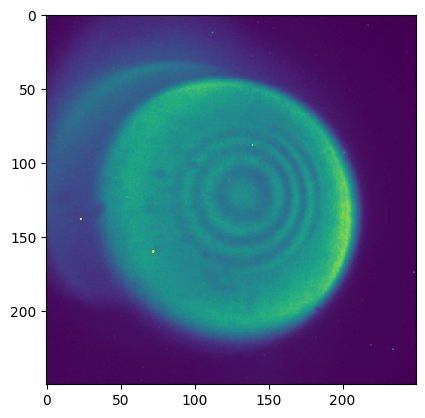

In [30]:
plt.imshow(img_list[-1], vmax=1200)
plt.show()

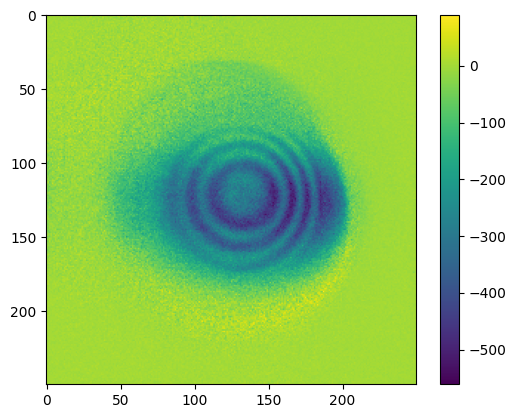

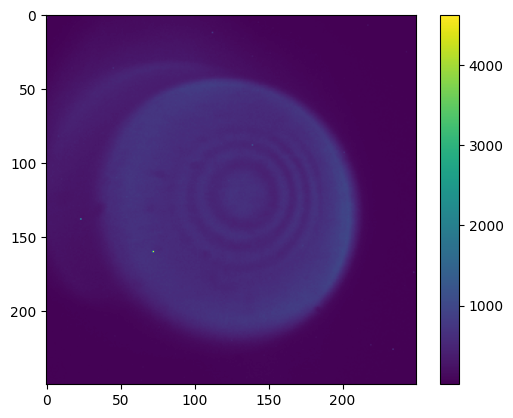

In [49]:
img_arr = np.array(img_list)
dark_diff = img_arr - dark_img
# plt.imshow(np.std(img_arr - dark_img, axis=0))
plt.imshow(dark_diff[0])
plt.colorbar()
plt.show()

plt.imshow(img_arr[0])
plt.colorbar()
plt.show()

## Save data

In [50]:
_DIRECTORY = './data/'
_FILENAME = 'fringes_test.h5'
data_file = h5py.File(_DIRECTORY + _FILENAME, 'w')

In [51]:
# create a dataset
img_arr = np.array(img_list)
data_file.create_dataset('img_data', data=img_arr)
data_file.create_dataset('piezo_steps', data=piezo_posns)
data_file.create_dataset('dark_img', data=dark_img)

<HDF5 dataset "dark_img": shape (250, 250), type "<f4">

In [52]:
data_file.attrs['acquisition_date'] = str(datetime.datetime.now())
data_file.attrs['exposure_time'] = 50000

In [53]:
data_file.close()

## Read data

In [54]:
# open the data file
data_file = h5py.File(_DIRECTORY + _FILENAME, 'r')

<KeysViewHDF5 ['dark_img', 'img_data', 'piezo_steps']>


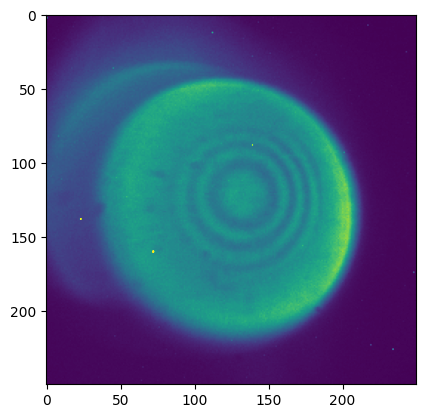

In [55]:
# look at the keys in the data file and extraxt an image to plot
print(data_file.keys())
img_arr = np.array(data_file['img_data'])

plt.imshow(img_arr[0], vmax=1200)
plt.show()

In [56]:
data_file.close()

# Finish

In [58]:
camera.shutdown()

In [57]:
z_fine.shutdown()

In [59]:
idler_shut.shutdown()